In [1]:
from splinter import Browser

In [2]:
import pandas as pd
import matplotlib as plt
import os

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from scripts import trulia_scraper
import json

In [5]:
webdriver_path = {'executable_path': r'chromedriver.exe'}

# initiate browser
browser = Browser('chrome', **webdriver_path, headless=False)

In [6]:
browser.visit('https://www.zillow.com/homes/for_sale/11101_r/')

In [10]:
f = open('./scripts/home_schema.json')
schema = json.load(f)

JSONDecodeError: Expecting ',' delimiter: line 8 column 5 (char 136)

In [8]:
home_urls = trulia_scraper.get_listing_urls_by_state_city(browser, 'NY', 'Port_Washington')

In [9]:
len(home_urls)

0

In [ ]:
with open('./Data/ny_queens.json', 'w') as j:
    json.dump(home_urls, j)

In [71]:
home_data = trulia_scraper.get_listings_by_listing_urls(browser,schema,home_urls)

In [72]:
with open('./Data/ny_port-washington_20210302.json', 'w') as d:
    json.dump(home_data, d)

In [73]:
hd = pd.DataFrame(home_data)

In [74]:
hd['listed_price'].max()

18000000

In [76]:
hd.columns

Index(['address_street', 'address_city_state', 'listed_price',
       'days_on_market', 'building_area', 'basement_features', 'bedrooms',
       'bathrooms', 'full_bathrooms', 'appliances_list', 'flooring_type',
       'garage_spaces', 'parking_features', 'sewer_type', 'year_built',
       'construction_materials', 'property_type', 'property_subtype',
       'architecture_style', 'mls_status', 'listing_status',
       'virtual_tour_url', 'mls_id', 'elementary_school',
       'elementary_school_district', 'jr_mid_school', 'jr_mid_school_district',
       'high_school', 'high_school_district', 'lot_area', 'tax_block',
       'tax_lot', 'tax_map_num', 'tax_amount'],
      dtype='object')

array([[<AxesSubplot:title={'center':'year_built'}>]], dtype=object)

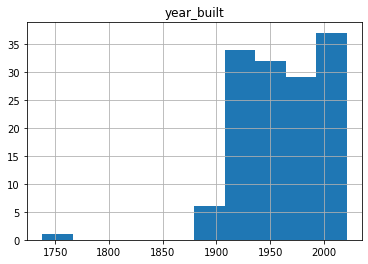

In [88]:
hd.hist(column='year_built')

In [90]:
hd.to_csv('./Data/listing_ny_port-washington_20210302.csv')